In [1]:
!nvidia-smi

Wed Mar  9 16:27:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
# unzip the dataset
!unzip /content/Drive/MyDrive/dataset_flower.zip -d /content/Drive/MyDrive/dataset_flower

Archive:  /content/Drive/MyDrive/dataset_flower.zip
replace /content/Drive/MyDrive/dataset_flower/dataset/Bluebell/image_0241.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
from imutils import paths

In [4]:
image_path = list(paths.list_images('/content/Drive/MyDrive/dataset_flower/'))
image_path

['/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0007.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0023.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0079.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0016.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0054.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0066.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0043.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0070.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0014.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0002.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0030.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0040.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daffodil/image_0077.jpg',
 '/content/Drive/MyDrive/dataset_flowe

In [5]:
import random

In [6]:
# Random shuffle the dataset
random.shuffle(image_path)
image_path

['/content/Drive/MyDrive/dataset_flower/dataset/Daisy/image_0866.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Iris/image_0436.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Snowdrop/image_0122.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Bluebell/image_0310.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Snowdrop/image_0153.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Pansy/image_1354.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/ColtsFoot/image_0931.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Cowslip/image_1103.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Snowdrop/image_0094.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Crocus/image_0353.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Crocus/image_0336.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Pansy/image_1289.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/LilyValley/image_0211.jpg',
 '/content/Drive/MyDrive/dataset_flower/dataset/Daisy

In [7]:
import os
from sklearn.preprocessing import LabelEncoder

In [8]:
os.path.sep

'/'

In [9]:
# Take all the labels
labels = [p.split(os.path.sep)[-2] for p in image_path]
labels

['Daisy',
 'Iris',
 'Snowdrop',
 'Bluebell',
 'Snowdrop',
 'Pansy',
 'ColtsFoot',
 'Cowslip',
 'Snowdrop',
 'Crocus',
 'Crocus',
 'Pansy',
 'LilyValley',
 'Daisy',
 'Daffodil',
 'Daisy',
 'Cowslip',
 'Buttercup',
 'Daisy',
 'Dandelion',
 'Daisy',
 'Daffodil',
 'Bluebell',
 'Sunflower',
 'Iris',
 'Pansy',
 'Fritillary',
 'Bluebell',
 'Dandelion',
 'LilyValley',
 'Fritillary',
 'Crocus',
 'Cowslip',
 'Bluebell',
 'Windflower',
 'Iris',
 'ColtsFoot',
 'Pansy',
 'Windflower',
 'Sunflower',
 'LilyValley',
 'Dandelion',
 'Tigerlily',
 'Dandelion',
 'Tulip',
 'Daffodil',
 'Buttercup',
 'Dandelion',
 'Fritillary',
 'Fritillary',
 'Iris',
 'Fritillary',
 'Crocus',
 'Iris',
 'Sunflower',
 'Daffodil',
 'Fritillary',
 'Dandelion',
 'Windflower',
 'Pansy',
 'Sunflower',
 'Tigerlily',
 'Iris',
 'ColtsFoot',
 'Daisy',
 'Daffodil',
 'Snowdrop',
 'Daisy',
 'Snowdrop',
 'Crocus',
 'Tulip',
 'Cowslip',
 'Daisy',
 'Fritillary',
 'Daisy',
 'Tigerlily',
 'ColtsFoot',
 'LilyValley',
 'Daffodil',
 'Buttercup'

In [10]:
# Turn the name of flower into number
le = LabelEncoder()
labels = le.fit_transform(labels)
print(f'We have {len(labels)} features')

We have 1360 features


In [11]:
import keras
import tensorflow as tf

In [12]:
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_keras_api_constants',
 '_keras_api_constants_v1',
 'activations',
 'backend',
 'backend_config',
 'callbacks',
 'constraints',
 'distribute',
 'engine',
 'initializers',
 'keras_export',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizer_experimental',
 'optimizer_v1',
 'optimizer_v2',
 'optimizers',
 'preprocessing',
 'protobuf',
 'regularizers',
 'saving',
 'tf2',
 'utils']

In [13]:
dir(tf.keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_sys',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'estimator',
 'experimental',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

In [14]:
model = tf.keras.applications.VGG16(weights = 'imagenet',include_top = False)

58900480/58889256 [==============================] - 1s 0us/step


In [15]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

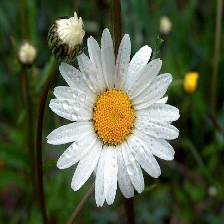

In [16]:
# Load image with tensorflow.keras.preprocessing function
img = tf.keras.preprocessing.image.load_img(image_path[0],target_size  = (224,224))
img

In [17]:
# Turn the image loaded into array
array = tf.keras.preprocessing.image.img_to_array(img)
print(array.shape)
array

(224, 224, 3)


array([[[21., 44., 18.],
        [25., 45., 20.],
        [32., 47., 24.],
        ...,
        [77., 80., 49.],
        [63., 67., 32.],
        [37., 41.,  6.]],

       [[26., 50., 24.],
        [30., 50., 25.],
        [35., 53., 29.],
        ...,
        [80., 83., 52.],
        [62., 66., 31.],
        [35., 39.,  4.]],

       [[27., 53., 26.],
        [30., 53., 27.],
        [35., 53., 29.],
        ...,
        [82., 82., 54.],
        [59., 63., 30.],
        [34., 38.,  5.]],

       ...,

       [[27., 47.,  0.],
        [25., 40.,  1.],
        [26., 32.,  6.],
        ...,
        [36., 65., 35.],
        [38., 64., 39.],
        [40., 66., 41.]],

       [[30., 47.,  3.],
        [25., 40.,  0.],
        [25., 37.,  1.],
        ...,
        [33., 63., 39.],
        [36., 64., 41.],
        [39., 67., 44.]],

       [[32., 49.,  5.],
        [28., 43.,  2.],
        [28., 40.,  4.],
        ...,
        [33., 63., 39.],
        [36., 64., 41.],
        [39., 67., 44.]]

In [18]:
import numpy as np
from tensorflow.keras.applications import imagenet_utils
array = np.expand_dims(array,0)

In [19]:
array = imagenet_utils.preprocess_input(array)
array

array([[[[ -85.939   ,  -72.779   , -102.68    ],
         [ -83.939   ,  -71.779   ,  -98.68    ],
         [ -79.939   ,  -69.779   ,  -91.68    ],
         ...,
         [ -54.939003,  -36.779   ,  -46.68    ],
         [ -71.939   ,  -49.779   ,  -60.68    ],
         [ -97.939   ,  -75.779   ,  -86.68    ]],

        [[ -79.939   ,  -66.779   ,  -97.68    ],
         [ -78.939   ,  -66.779   ,  -93.68    ],
         [ -74.939   ,  -63.779   ,  -88.68    ],
         ...,
         [ -51.939003,  -33.779   ,  -43.68    ],
         [ -72.939   ,  -50.779   ,  -61.68    ],
         [ -99.939   ,  -77.779   ,  -88.68    ]],

        [[ -77.939   ,  -63.779   ,  -96.68    ],
         [ -76.939   ,  -63.779   ,  -93.68    ],
         [ -74.939   ,  -63.779   ,  -88.68    ],
         ...,
         [ -49.939003,  -34.779   ,  -41.68    ],
         [ -73.939   ,  -53.779   ,  -64.68    ],
         [ -98.939   ,  -78.779   ,  -89.68    ]],

        ...,

        [[-103.939   ,  -69.779   ,  -

In [20]:
array.shape

(1, 224, 224, 3)

In [21]:
# Load image and resize into VGG16 input (224,224)
list_image = []
for (j,path) in enumerate(image_path):
  # load the image 
  image = tf.keras.preprocessing.image.load_img(path,target_size = (224,224))
  # turn the image into array
  array = tf.keras.preprocessing.image.img_to_array(image)
  # expand the dim of image (number,height,width,channels)
  array = np.expand_dims(array,0)
  # preprocess the image with imagenet utils
  array = imagenet_utils.preprocess_input(array)
  list_image.append(array)
list_image

KeyboardInterrupt: ignored

In [ ]:
X = np.vstack((list_image))
X.shape # 1360 * 224

(1360, 224, 224, 3)

In [ ]:
with open('/content/Drive/MyDrive/X.npy','wb') as f:
  np.save(f,X)

In [22]:
# load input storage as numpy array
X = np.load('/content/Drive/MyDrive/X.npy')
X.shape

(1360, 224, 224, 3)

In [23]:
# Use pretrain model to take the features of image, c
features = model.predict(X)

In [24]:
features.shape # the feature layer extracted from 1360 image

(1360, 7, 7, 512)

In [25]:
# Save your features again
with open('/content/Drive/MyDrive/features.npy','wb') as f:
  np.save(f,features)

In [26]:
# Load the features
features = np.load('/content/Drive/MyDrive/features.npy',allow_pickle = True)
features.shape

(1360, 7, 7, 512)

In [27]:
# load input storage as numpy array
X = np.load('/content/Drive/MyDrive/X.npy')
X.shape

(1360, 224, 224, 3)

In [28]:
import matplotlib.pyplot as plt

In [29]:
features.shape[-1]

512

In [30]:
# random choice
random_layer = np.random.randint(0,features.shape[-1])
random_layer

409

Text(0.5, 1.0, 'pic: 594 layer: 409')

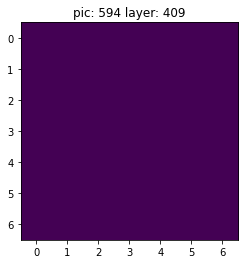

In [31]:
random_pic  = np.random.randint(0,features.shape[0])
plt.imshow(features[random_pic][:,:,random_layer])
plt.title(f'pic: {random_pic} layer: {random_layer}')

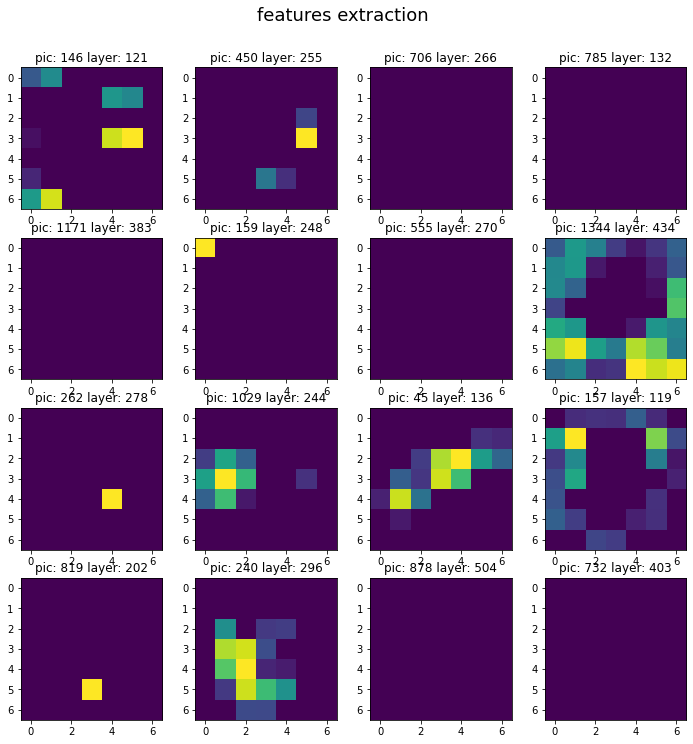

In [32]:
fig,ax = plt.subplots(nrows= 4,ncols = 4,figsize = (12,12))
plt.subplots_adjust(hspace =0.2)
fig.suptitle('features extraction',fontsize = 18,y =0.95)

for i in range(4*4):
  ax = plt.subplot(4,4,i+1)
  random_layer = np.random.randint(0,features.shape[-1])
  random_pic  = np.random.randint(0,features.shape[0])
  plt.imshow(features[random_pic][:,:,random_layer])
  plt.title(f'pic: {random_pic} layer: {random_layer}')


In [33]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

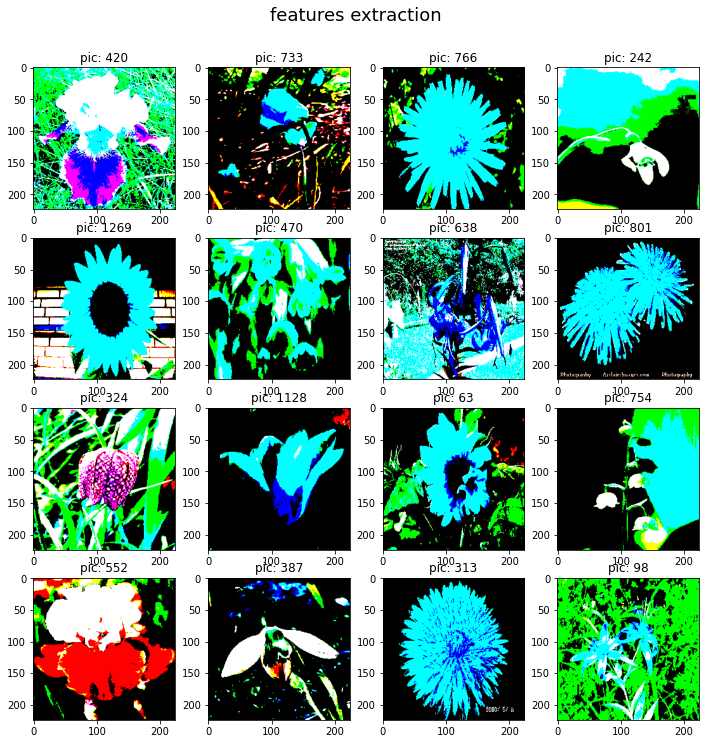

In [34]:
# Plot random dataset
fig,ax = plt.subplots(nrows= 4,ncols = 4,figsize = (12,12))
plt.subplots_adjust(hspace =0.2)
fig.suptitle('features extraction',fontsize = 18,y =0.95)

for i in range(4*4):
  ax = plt.subplot(4,4,i+1)
  random_layer = np.random.randint(0,X.shape[-1])
  random_pic  = np.random.randint(0,X.shape[0])
  plt.imshow(X[random_pic])
  plt.title(f'pic: {random_pic}')


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [49]:
# Reshape the features
features = features.reshape((features.shape[0],512*7*7))
print(features.shape)

(1360, 25088)


In [50]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size =0.2,random_state  =42)

In [51]:
print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'X_test.shape {X_test.shape}')
print(f'y_test.shape {y_test.shape}')

X_train.shape (1088, 25088)
y_train.shape (1088,)
X_test.shape (272, 25088)
y_test.shape (272,)


In [56]:
# Grid search to find the best parameter for the model C = 1/lamba
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
params = {'C':[0.1,1.0,1.0,100.0]}
model = GridSearchCV(LogisticRegression(),params)

In [57]:
model = GridSearchCV(LogisticRegression(), params)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 1.0, 100.0]})

In [58]:
print('Best parameter for the model {}'.format(model.best_params_))

Best parameter for the model {'C': 100.0}


In [59]:
# predict preds
preds = model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.08      0.05      0.06        20
           1       0.00      0.00      0.00        10
           2       0.12      0.11      0.11        18
           3       0.00      0.00      0.00        16
           4       0.10      0.06      0.08        16
           5       0.00      0.00      0.00        16
           6       0.04      0.06      0.05        18
           7       0.03      0.08      0.05        12
           8       0.00      0.00      0.00        17
           9       0.09      0.12      0.10        17
          10       0.17      0.06      0.09        17
          11       0.03      0.08      0.05        12
          12       0.25      0.05      0.09        19
          13       0.33      0.05      0.09        19
          14       0.10      0.08      0.09        12
          15       0.05      0.08      0.06        12
          16       0.00      0.00      0.00        21

    accuracy              